# Least Squares  Polynomial Fitting (0.9 points)

## Introduction

As discussed during Week 2, one can use linear regression to fit a nonlinear function to data via a nonlinear embedding function $\phi: \mathbb{R}^D \rightarrow \mathbb{R}^D \times \mathbb{R}^K$. One can then express a nonlinear function as an inner product:
$$f(\mathbf{\mathbf{x}}) = \langle \mathbf{w}, \phi(\mathbf{x})\rangle $$

In this assignment, we consider the case of an embedding function that takes a point $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(\mathbf{x}) =  \langle \mathbf{w}_K, \phi_K(\mathbf{x})\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + x_K \mathbf{x}^K $$


If the quality of the approximation on point set $\mathcal{S}$ is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2,
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


## Assignment

We first use the function `pickle.load` to load the dataset from the file `data_pol_fit.pkl`, and then display the training and test sets. 

This dataset is made of input-output pairs $\mathcal{S} = \{(x_i,y_i)\}$ where $x_i, y_i \in \mathbb{R}^D$ with $D=1$, and $1\leq i \leq 30$. 
Your task is to estimate a function $f:\mathbb{R}^D\rightarrow \mathbb{R}^D$ that can accurately approximate the underlying input-output mapping. Even though $D=1$ in the dataset, your code should work for any dimension of the input space.


1. (.4/.9) Fill in the necessary functions to determine the optimal weights from the input samples. 
2. (.1/.9) Plot the estimated functions within the interval $[-1,1]$. 
3. (.4/.9) Plot  the value of the loss as a function of  the polynomial's order
 (a) on the training set and the (b) test set. Plot the two functions together. What do you observe? Do you have a possible interpretation of this result?

## Import test and training data from 1Ddata.mat

In [169]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [170]:
with open('data_pol_fit.pkl', 'rb') as handle:
        data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

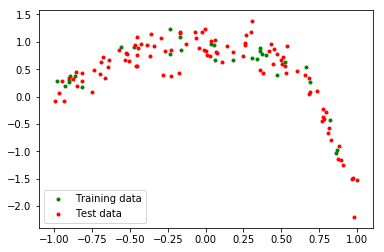

In [11]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")
ax.legend()
plt.show()

## Define function poly 
The `poly` function takes a vector $\mathbf{x}\in\mathbb{R}^D$ and a $K+1$-dimensional vector $\mathbf{w}$ as arguments, and returns the value of the $K$-th order polynomial: 
$$ f_K(\mathbf{x}) =  \langle \mathbf{w}_K, \phi_K(\mathbf{x})\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + x_K \mathbf{x}^K $$

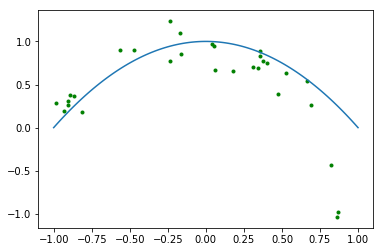

In [113]:
def poly(x, weight):
    # TODO: Question 1
    y = 0
    for i in range(len(weight)):
        y += weight[i]*(x**i)
    # /TODO
    return y

# Visualize the function to check if it is correct.
w = [1, 0, -1]
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

In [115]:
y.shape

(100,)

## Define embedding function

Now we need to define an embedding function that takes a vector $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

$K$ should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. In other words, with an input vector $\mathbf{x} = [x_1, x_2, \ldots, x_N]^T$, the output should be the following array: 


$$\phi_K(\mathbf{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^K  
\end{array}\right]$$

In [13]:
# x is expected to be a numpy array of dimensions (N,)
def embedding_func(x, K):
    # TODO: Question 1
    rows=len(x)
    cols=K+1
    F=np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            F[i][j] = x[i]**j
    # /TODO
    return F

x = np.array([2, 3])
print(embedding_func(x, 4))

[[ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


## Define a function that fits a $K$-th order polynomial and returns a weight vector $\mathbf{w}$

The input arguments for the function are $(x,y,K)$ with $x,y\in\mathbb{R}^D$.

Optional tip: In python 3.6+ you can write `A @ B` to do matrix multiplication instead of `np.matmul(A, B)`.

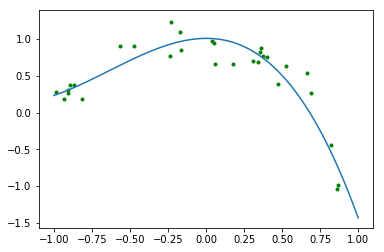

In [14]:
def estimate_w(y, X, K):
    # TODO: Question 1
    A = embedding_func(X, K)
    w = np.linalg.inv(A.T@A)@A.T@y
    # /TODO
    return w

w = estimate_w(y_train, x_train, 3)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

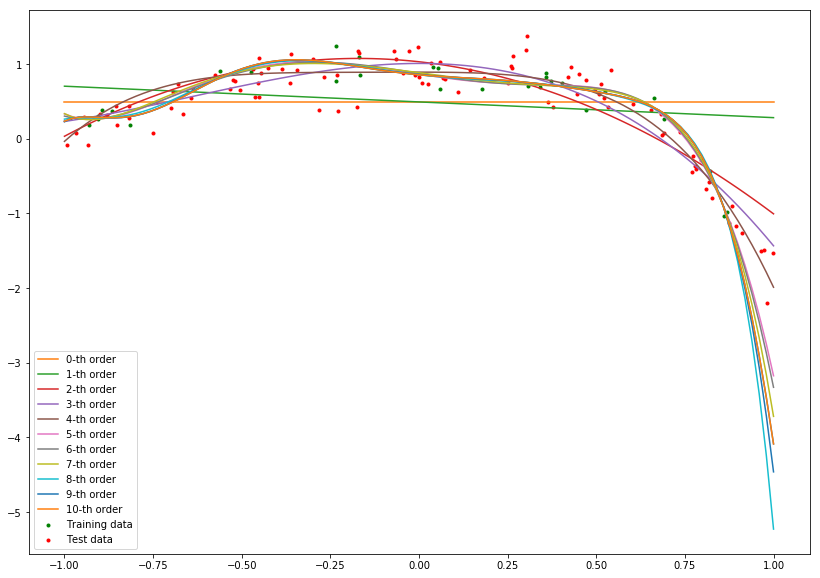

In [162]:
max_poly = 10

weights_store = list()

fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(x, y)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
plt.scatter(x_train, y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test, y_test, c='r', marker='.', label="Test data")

for poly_degree in range(max_poly+1):
    # TODO: Question 2
    w = estimate_w(y_train, x_train, poly_degree)
    weights_store.append(w)
    y = poly(x,weights_store[poly_degree])
    order = str(poly_degree) + '-th order'
    ax.plot(x, y, label = order )
    # /TODO
    
ax.legend()
plt.show()

## Compute the train and test error

Calculate the train and the test error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2
\end{equation}

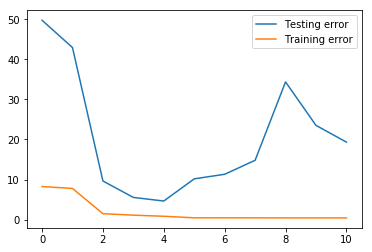

In [168]:
error_train = np.zeros(max_poly+1)
error_test = np.zeros(max_poly+1)

for poly_degree in range(max_poly+1):
    # TODO: Question 3
    w_estimate = estimate_w(y_train, x_train, poly_degree)  #estimate w
    
    y_1 = poly(x_train,w_estimate) #estimated y
    y_2 = poly(x_test,w_estimate)

    for i in range(len(y_1)):
        error_train[poly_degree] +=(y_train[i] - y_1[i])**2
    for j in range(len(y_2)):
        error_test[poly_degree] +=(y_test[j] - y_2[j])**2
    # /TODO
    
fig, ax = plt.subplots()
ax.plot(error_test, label="Testing error")
ax.plot(error_train, label="Training error")
ax.legend()
plt.show()

In [153]:
# TODO: Question 3 (Comment results)
#For training, as dimension increases, training error decreases. This is because more variables will better reflect the training data, which means 
#the model will better fit the data. As the dimension increases, the testing error decreases. But as the dimension keeps increasing, the predictability of 
#the model decreases because the model is too flexible, which will increase testing error instead.i

# 2. Linear versus logistic regression (0.7 points)

In this section, we compare the robustness of linear and logistic regression. Linear regression has already been implemented for you. Please go through the code and comments comments before advancing to the remainder. 

As discussed in class, the merit function (or, criterion, $C$) driving logistic regression is:

\begin{eqnarray}
C(\mathbf{w}) = \sum_{i=1}^{N} y^i \log(g(\langle\mathbf{x}^i,\mathbf{w}\rangle)  + (1-y^i) \log(1-g(\langle\mathbf{x}^i,\mathbf{w}\rangle)).
\end{eqnarray}

Maximize this criterion for the provided dataset. Use Week 3 slides as a reference: we first need to compute the first and second order differentials, corresponding to $\nabla(\mathbf{w})$ and $H(\mathbf{w})$, respectively. 


1. (.4/.7) Implement the Newton-Raphson algorithm. This includes computing $\nabla(\mathbf{w})$ and $H(\mathbf{w})$ at every step. Consider that convergence is achieved when $||\mathbf{w}^{t} - \mathbf{w}^{t-1}|| < .001 ||\mathbf{w}^t||$

2. (.2/.7) Record the merit function $C(\mathbf{w}^t)$ at each Newton-Raphson iteration, so that it can be plotted.

3. (.1/.7) Compute and plot the boundary fitted by logistic regression. Compare the robustness of the fitted boundaries for the two experiments.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data generation and visualization

In [67]:
def evaluate_linear_discriminant_on_grid(w_linear, loc_x, loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    sz_m, sz_n = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [68]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)

test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

(3, 1000)


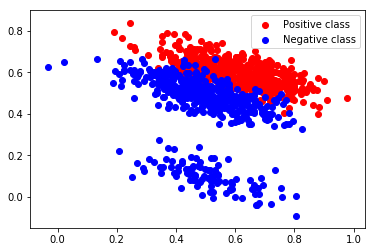

In [69]:
# Display your data
pos = np.nonzero(train_labels==1)[1]  
neg = np.nonzero(train_labels!=1)[1]
print(train_features.shape)
fig, ax = plt.subplots()
ax.scatter(train_features[0, pos], train_features[1,pos], c="r", label="Positive class")
ax.scatter(train_features[0, neg], train_features[1,neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Linear Regression

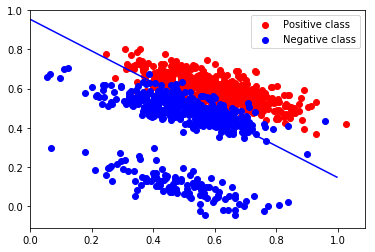

In [70]:
##---------------------------------------------------------------
## First part - (done for you)
##---------------------------------------------------------------

## Train a linear classifier

## in slide 31, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T #1000*3
Y = train_labels.T  #1000*1

##  form X^T X
XX = np.dot(X.T, X) #3*3

##  form X^T Y
YX = np.dot(X.T, Y) #3*1

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w = np.linalg.solve(XX, YX)

## visualize classifier
fig, ax = plt.subplots()
## step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Logistic regression

[[ 26.17258341]
 [ 55.51489505]
 [-44.4850257 ]]


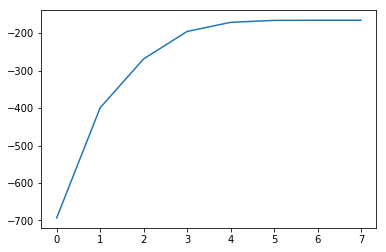

In [71]:
##---------------------------------------------------------------
## Second part -  logistic regression 
##---------------------------------------------------------------
w = np.array([[0], [0], [0]]) # Initialize w
#w 3*1 X 1000*3 Y 1000*1

merits = []
while 1: # Continue until converge criterion is met
    # TODO (Question 1 and 2)

    # logistics regression
    def g(x):
        g = 1/(1+np.exp(-x))
        return g
    
    # loss function
    C = Y.T @ (np.log(g(X @ w))) + (1 - Y).T @ (np.log(1 - g(X @ w)))  #array(1,1)
    C = float(C)
    # derivative1
    derivative1 = -((Y - g(X @ w)).T @ X) #1*3
    
    #R
    R_1 = np.diag(g(X @ w) @ (1 - g(X @ w)).T) #1000*1000 diagonal: extract elements on diagonal
    R = np.diag(R_1)
    
    # derivative2 
    derivative2 = X.T @ R @ X #Hessian 3*3
    
    delta = np.linalg.solve(derivative2,  derivative1.T)
    w = w - delta
    
    merits.append(C)
    
    if(np.linalg.norm(delta) < 0.001 * np.linalg.norm(w)):
        break
w_best = w
print(w_best)
    # /TODO

fig, ax = plt.subplots()
ax.plot(merits)
plt.show()

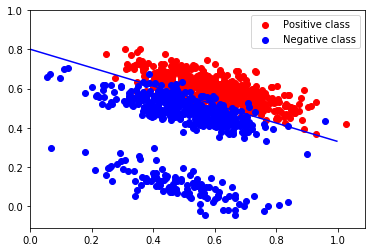

In [74]:
# TODO: Question 3
## Step 1: get its value over a regular grid of positions
#logistics
f, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w_best, loc_x, loc_y)
function_values = g(f) 
## Step 2: plot the set of positions where its value equals .5
fig, ax = plt.subplots()
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
# /TODO

## Step 3: superimpose the points of the test set

pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

In [77]:
# TODO :Question 3 (Comment results)
# Comparing with boundary fitted by linear regression, boundary fitted by logistic regression is better because more objectives are classified right than
# linear classifer. If parameters of linear classifier and logistic classifer change, the linear classifer will be changed more significantly because for 
# logistic classifer, the influence will be decreased by 'log' function. That is to say logistic classifier is more robust than linear classifer.